In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [58]:
df = pd.read_csv('Advertising.csv')

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [59]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()
df.shape

(200, 4)

In [60]:
X = df.drop(columns='sales')
y= df['sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4, test_size= 0.3)
X_train.shape,X_test.shape

((140, 3), (60, 3))

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.coef_

array([0.04533392, 0.17715767, 0.00553852])

In [62]:
X_test.head()

,TV,radio,newspaper
11,214.7,24.0,4.0
99,135.2,41.7,45.9
128,220.3,49.0,3.2
175,276.9,48.9,41.8
1,44.5,39.3,45.1


In [63]:
y_pred_test = lr.predict(X_test)
y_pred_test[:5]

array([17.09777441, 16.86148273, 21.7761552 , 24.53812602, 12.32008724])

In [64]:
# Evaluation of Linear Regression Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

print(f"The Mean absolute error is {mean_absolute_error(y_test, y_pred_test)}")
print(f"The Mean squared error is {mean_squared_error(y_test, y_pred_test)}")
print(f"The Root mean squared error is {root_mean_squared_error(y_test, y_pred_test)}")
print(f"The R2 score is {r2_score(y_test, y_pred_test)}")

The Mean absolute error is 1.2111525124980485
The Mean squared error is 2.2237746679115573
The Root mean squared error is 1.4912326002041256
The R2 score is 0.9127220729596172


In [65]:
# Regularization of Regression models

# LASSO Regularization
from sklearn.linear_model import Lasso

l1 = Lasso()

l1.fit(X_train,y_train)

y_pred_test = l1.predict(X_test)

print(f"The new R2 score is {r2_score(y_test, y_pred_test)}")

The new R2 score is 0.9112250903194142


In [66]:
# Ridge Regression

from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X_train, y_train)

y_pred_test = L2.predict(X_test)

print(f"The new R2 score is {r2_score(y_test, y_pred_test)}")



The new R2 score is 0.9127183051915455


In [67]:
# ElasticNet Regression

from sklearn.linear_model import ElasticNet

EN = ElasticNet()
EN.fit(X_train, y_train)

y_pred_test = EN.predict(X_test)

print(f"The new R2 score is {r2_score(y_test, y_pred_test)}")


The new R2 score is 0.9117469302155122


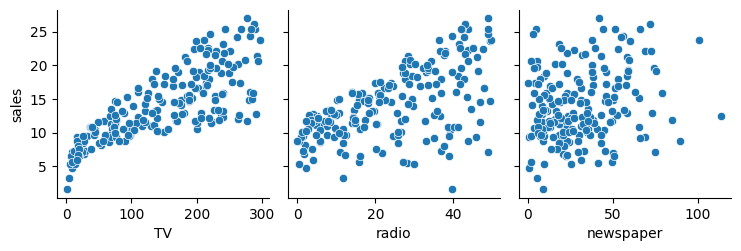

In [69]:
# Assumptions of Linear Regression

# Linear Relationship between the features and the target

import seaborn as sns
df.head()
sns.pairplot(df, x_vars= ['TV', 'radio', 'newspaper'], y_vars = ['sales'])
plt.show()

In [71]:
# Multi COllinearity
# VIF Score

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_score(X):
    X_arr = X.values
    vif = [variance_inflation_factor(X_arr, i) for i in range(X.shape[1])]
    vif_score = pd.DataFrame()
    vif_score ['vif_score'] = vif
    vif_score['Features'] = X.columns
    return vif_score

vif_score(X)

,vif_score,Features
0,2.486772,TV
1,3.285462,radio
2,3.055245,newspaper


In [72]:
# If VIF SCORE < 4 No or very minimum multi collinearity in the dataset
# If VIF SCORE > 4 multi collinearity in the dataset (To reduce multi collinearity drop the column which > 4)